# Background subtraction (tách nền):

### Các bước thực hiện

1. Đưa cả 3 ảnh về cùng kích thước.
2. Dùng kỹ thuật background subtraction với Object Image và Original Background Image để lấy mask của object.
3. Mask object là một ảnh binary (Foreground Mask), sẽ gồm 2 giá trị: 0 là background, 1 là vùng pixel chứa object.
4. Tạo ra ảnh output bằng cách: tại vị trí pixel nào = 1 thì lấy giá trị của Object Image và vị trí nào = 0 thì lấy giá trị của Target Background Image.

### (a) Resize các ảnh đầu vào về cùng kích thước

In [1]:
# Download image
!gdown 1X78_4B8A6Z4aN-qpsEaA_RLvkNfwoIrQ
!gdown 1Gv-H6SVaYK8XDs3RPlOS_Rq0a8cZkA8w
!gdown 1RnBB-dsB3b77rCdOcaPdqpBOVJ_P3h07

Downloading...
From: https://drive.google.com/uc?id=1X78_4B8A6Z4aN-qpsEaA_RLvkNfwoIrQ
To: /content/GreenBackground.png
100% 5.51k/5.51k [00:00<00:00, 12.4MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Gv-H6SVaYK8XDs3RPlOS_Rq0a8cZkA8w
To: /content/NewBackground.jpg
100% 64.3k/64.3k [00:00<00:00, 57.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1RnBB-dsB3b77rCdOcaPdqpBOVJ_P3h07
To: /content/Object.png
100% 51.0k/51.0k [00:00<00:00, 38.8MB/s]


In [2]:
import numpy as np
from google.colab.patches import cv2_imshow
import cv2

bg1_image = cv2.imread('GreenBackground.png', 1)
bg1_image = cv2.resize(bg1_image, (678, 381))

ob_image = cv2.imread('Object.png', 1)
ob_image = cv2.resize(ob_image, (678, 381))

bg2_image = cv2.imread('NewBackground.jpg', 1)
bg2_image = cv2.resize(bg2_image, (678, 381))

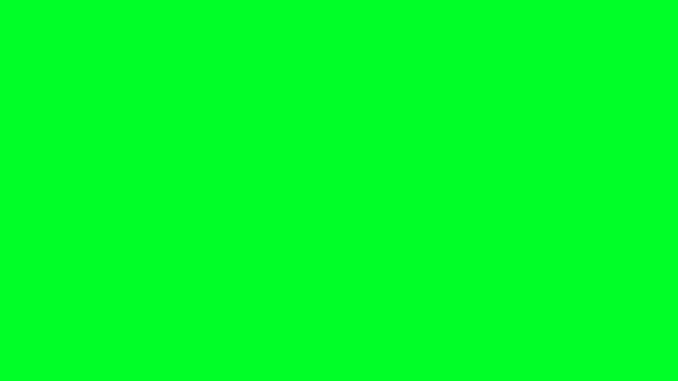

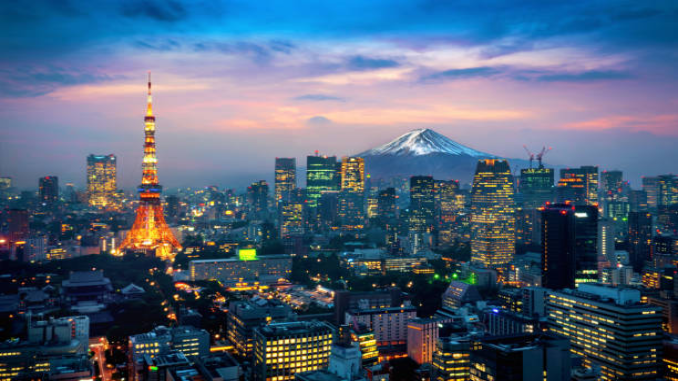

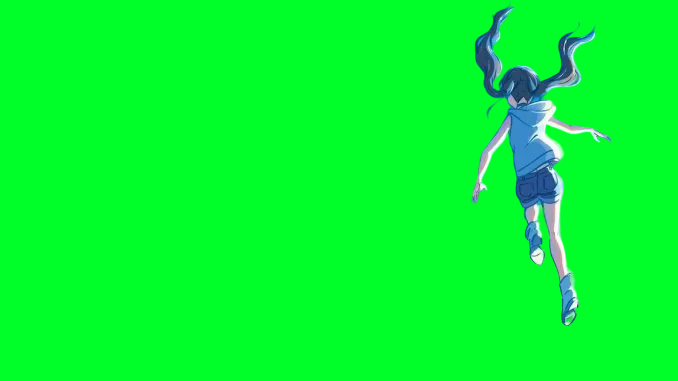

In [44]:
cv2_imshow(bg1_image)
cv2_imshow(bg2_image)
cv2_imshow(ob_image)

### (b) Xây dựng hàm compute_difference()

In [36]:
def compute_difference(bg_img, input_img):
  # *********** Your code here ***********
  difference_single_channel = cv2.absdiff(bg_img, input_img)

  return difference_single_channel

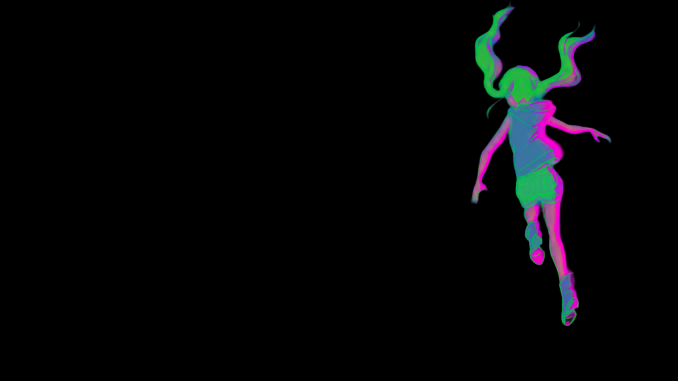

In [37]:
difference_single_channel = compute_difference(bg1_image, ob_image)
cv2_imshow(difference_single_channel)

### (c) Xây dựng hàm compute_binary_mask()

In [38]:
def compute_binary_mask(difference_single_channel):
  # *********** Your code here ***********
  _, difference_binary = cv2.threshold(difference_single_channel, 20, 255, cv2.THRESH_BINARY)
  return difference_binary

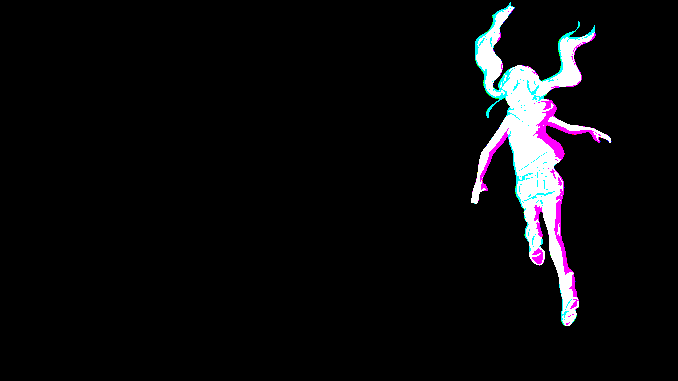

In [39]:
binary_mask = compute_binary_mask(difference_single_channel)
cv2_imshow(binary_mask)

### (d) Xây dựng hàm replace_background()

In [40]:
def replace_background(bg1_image, bg2_image, ob_image):
  # *********** Your code here ***********
  difference_single_channel = compute_difference(
      bg1_image,
      ob_image
      )

  binary_mask = compute_binary_mask(difference_single_channel)
  output = np.where(binary_mask==255, ob_image, bg2_image)
  return output

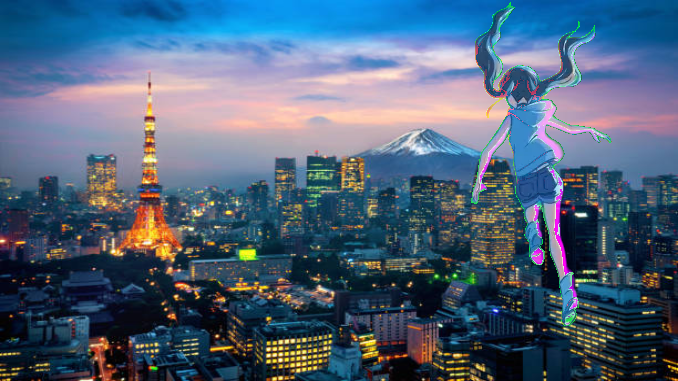

In [41]:
output_image = replace_background(bg1_image, bg2_image, ob_image)
cv2_imshow(output_image)